# Import

In [1]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats
# visualize
import seaborn as sns
import matplotlib.pyplot as plt

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

#import my modules
import prepare
import acquire
import explore
import model_func 


# for preparation state
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

## Summary:
- Target : Churn
- Driver : Tenure 
- Overall churn rate: 26.53%
- All the classification models that I created perfomed better than my baseline (no churn). Baseline accuracy is 73.472%
- I choose my logistic regression as my best model with accuracy of  80.48%.
- Exploring my data, I found that in the first month of tenure the churn rate (62.35%) is really higher than overall churn rate and more than 50 % of the customers who canceled had electronic check as a payment type  ad paperless billing.
- Recommendation : Incentive of 10% off monthly charges starting 2nd payment if the customer signs up for  :
    - autopayment
    - paperless billing

## <font color=green>Plan <font color=black>-> Acquire -> Prepare -> Explore -> Model -> Deliver

- README.md with :  project description  and goals, data dictionary, project planning, Initial ideas/hypotheses stated, instructions for recreating project/running repo
- Acquire data from the Codeup Database using my own  function to automate this process. this function is saved in acquire.py file to import into the Final Report Notebook.
- Clean and prepare data for preparation step. Create a function to automate the process.  The function is saved in a prepare.py module.  Use the function  in Final Report Notebook.
- Define two hypotheses, set an alpha, run the statistical tests needed,document findings and takeaways.
- Establish a baseline accuracy and document well.
- Train three different classification models.
- Evaluate models on train and validate datasets.
- Choose the model that performs the best.
- Evaluate the best model (only one) on the test dataset
- Create csv file with customer_id, probability of churn, and prediction of churn


## Plan -><font color=green> Acquire -> <font color=black>Prepare -> Explore -> Model -> Deliver

- I created a function reads in telco_churn data from Codeup database, writes data to a csv file if a local file does not exist, and returns a df.
- I import my get_telco_churn() function from acquire.py file.

In [2]:
#acquire data from  MySQL db using my function.

df = acquire.get_telco_churn()

In [3]:
#check my acquired df
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [4]:
#check how many rows and columns 
df.shape

(7043, 24)

In [5]:
# check the columns, type of columns and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


## Plan -> Acquire -> <font color=green>Prepare <font color=black> -> Explore -> Model -> Deliver

- I created a function to clean and split my data.
- I import my prepare( ) function from prepare.py file.

**Clean data**
   - Drop duplicates
   - Change 'total_charges' to a float type
       - there are missing values (' '). 
   - Convert all the columns that have yes/no to 0/1
   - Create dummy vars from 'gender', 'contract_type','internet_service_type', 'payment_type'
   - Rename columns : 
        - 'tenure' --> 'tenure_months'
        - 'None' --> 'has_internet' ('None' was created in my dummies)
   -  drop payment_type_id', 'internet_service_type_id','contract_type_id'

**Split Data**
   - Data is split into train (50%), validate (30%), and test (20%).
   - random_state=123
   - stratify on churn

**PLOT VARIABLE DISTRIBUTIONS**

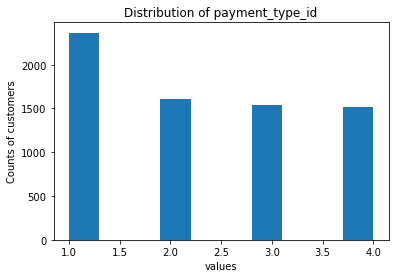

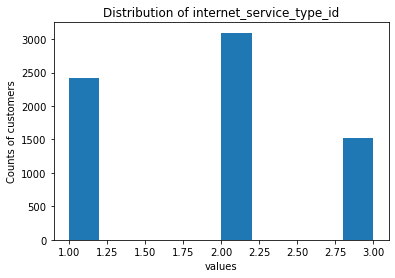

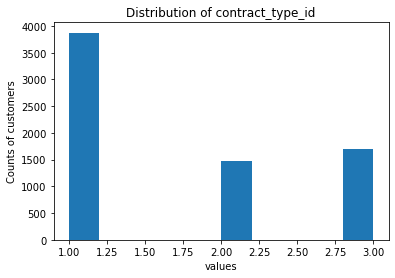

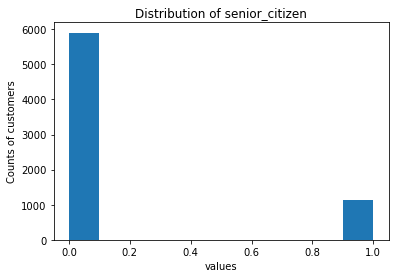

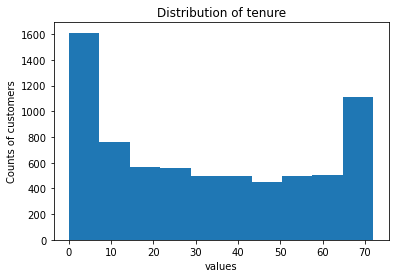

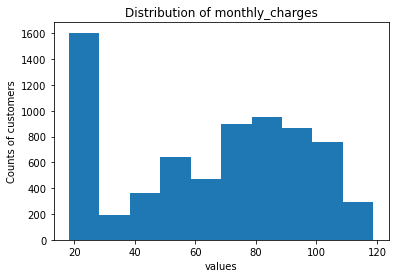

In [7]:
#use my function to plot
prepare.distribution(df)

In [8]:
#use my function that cleans and splits data
train, validate, test = prepare.prepare(df)

In [9]:
print('train shape    :',train.shape)
print('validate shape :',validate.shape)
print('test shape     :',test.shape)

train shape    : (3943, 29)
validate shape : (1691, 29)
test shape     : (1409, 29)


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5642 to 6840
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                3943 non-null   object 
 1   senior_citizen             3943 non-null   int64  
 2   partner                    3943 non-null   int64  
 3   dependents                 3943 non-null   int64  
 4   tenure_months              3943 non-null   int64  
 5   phone_service              3943 non-null   int64  
 6   multiple_lines             3943 non-null   int64  
 7   online_security            3943 non-null   int64  
 8   online_backup              3943 non-null   int64  
 9   device_protection          3943 non-null   int64  
 10  tech_support               3943 non-null   int64  
 11  streaming_tv               3943 non-null   int64  
 12  streaming_movies           3943 non-null   int64  
 13  paperless_billing          3943 non-null   in

##          Plan -> Acquire -> Prepare  -> <font color=green>Explore <font color=black>-> Model -> Deliver

- I created  functions to plot and  make a report  based on tenure
- I import my functions from explore.py file.

### - Target : <font color=red> Churn

In [11]:
# let's calculate the churn rate
churn_rate = train['churn'].mean()

In [12]:

print(f'Churn rate: {churn_rate:.2%}')


Churn rate: 26.53%


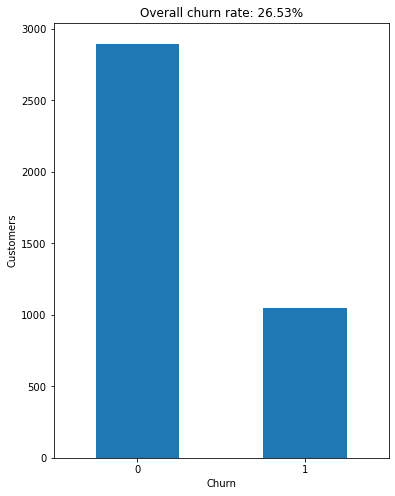

In [13]:
plt.figure(figsize=(6,8))
train.churn.value_counts().plot.bar(rot=0 )
plt.title(f"Overall churn rate: {churn_rate:.2%}")
plt.xlabel('Churn')
plt.ylabel('Customers')

plt.show()

In [14]:
#calculate the correlation of all columns in the dataframe.
train_corr = train.corr()
train_corr

,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,month_to_month,one_year,two_year,dsl,fiber_optic,has_internet,bank_transfer_(automatic),credit_card_(automatic),electronic_check,mailed_check
senior_citizen,1.000000,0.021704,-0.201859,0.007666,0.017884,0.113170,-0.223637,-0.180790,-0.184644,-0.233621,...,0.157663,-0.051119,-0.134109,-0.120798,0.273674,0.191692,-0.015985,-0.012184,0.173069,-0.167323
partner,0.021704,1.000000,0.463617,0.366470,0.041129,0.138106,0.062610,0.063210,0.065330,0.045711,...,-0.268490,0.070877,0.243511,-0.010031,0.005104,-0.005469,0.094710,0.084683,-0.078225,-0.089288
dependents,-0.201859,0.463617,1.000000,0.160178,0.000945,-0.009975,0.190725,0.170296,0.163513,0.182896,...,-0.236495,0.062744,0.214199,0.049894,-0.167655,-0.145469,0.065442,0.056857,-0.163981,0.063927
tenure_months,0.007666,0.366470,0.160178,1.000000,0.006187,0.251475,0.072982,0.096895,0.091084,0.074255,...,-0.637509,0.198606,0.549839,0.020264,0.023973,0.052663,0.229637,0.241171,-0.215684,-0.222408
phone_service,0.017884,0.041129,0.000945,0.006187,1.000000,0.680810,0.144817,0.172211,0.157886,0.145593,...,0.004231,-0.005385,0.000155,-0.457254,0.295699,-0.172852,-0.002827,-0.006338,0.020748,-0.014355
multiple_lines,0.113170,0.138106,-0.009975,0.251475,0.680810,1.000000,-0.077098,-0.029548,-0.039713,-0.074705,...,-0.063852,-0.001498,0.075081,-0.375747,0.429184,0.083952,0.063351,0.039014,0.070523,-0.180946
online_security,-0.223637,0.062610,0.190725,0.072982,0.144817,-0.077098,1.000000,0.880648,0.880960,0.899994,...,-0.333326,0.099498,0.291552,-0.272998,-0.503865,-0.929045,0.035474,0.040707,-0.337960,0.305863
online_backup,-0.180790,0.063210,0.170296,0.096895,0.172211,-0.029548,0.880648,1.000000,0.876569,0.880710,...,-0.305250,0.092452,0.265745,-0.342592,-0.430394,-0.920802,0.035530,0.034741,-0.295689,0.263997
device_protection,-0.184644,0.065330,0.163513,0.091084,0.157886,-0.039713,0.880960,0.876569,1.000000,0.889550,...,-0.330609,0.098942,0.288936,-0.344440,-0.428472,-0.920618,0.036868,0.038843,-0.302230,0.266008
tech_support,-0.233621,0.045711,0.182896,0.074255,0.145593,-0.074705,0.899994,0.880710,0.889550,1.000000,...,-0.351141,0.101329,0.310396,-0.277070,-0.498879,-0.927728,0.042540,0.031986,-0.336475,0.305737


In [15]:
#let's focus on churn
cols= train_corr['churn'].sort_values(ascending=False)
cols

churn                        1.000000
month_to_month               0.409166
fiber_optic                  0.303591
electronic_check             0.298034
has_internet                 0.223698
monthly_charges              0.189040
paperless_billing            0.187409
senior_citizen               0.165482
multiple_lines               0.037585
phone_service                0.011995
male                         0.006885
female                      -0.006885
mailed_check                -0.095605
bank_transfer_(automatic)   -0.116189
dsl                         -0.124500
credit_card_(automatic)     -0.127042
partner                     -0.137696
dependents                  -0.160315
one_year                    -0.185215
total_charges               -0.201972
streaming_tv                -0.214859
streaming_movies            -0.219114
device_protection           -0.269440
online_backup               -0.275924
two_year                    -0.298877
online_security             -0.307907
tech_support

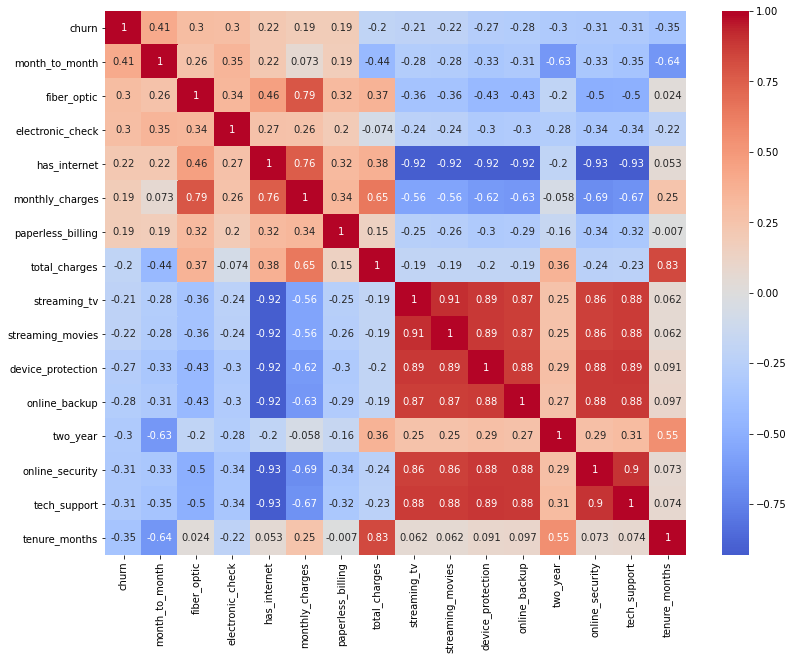

In [16]:
#get the list  of  -0.2 >values > .18 
col_listf = list(cols[cols > .18].index)  + list(cols[cols < (-.2)].index)
col_listf

#plot heatmap
plt.figure(figsize=(13,10))
sns.heatmap(train[col_listf].corr() , cmap='coolwarm', center=0, annot=True)

plt.title('')
plt.show()

<div class="alert alert-block alert-info">
<b>Takeaways:</b>
    
- Positive correlations:
     - month_to_month
     - fiber_optic
     - electronic_check

    
- Negative correlations: 
     - tenure_months
     - tech_suport
     - online_security 



**Plot features with more correlation**

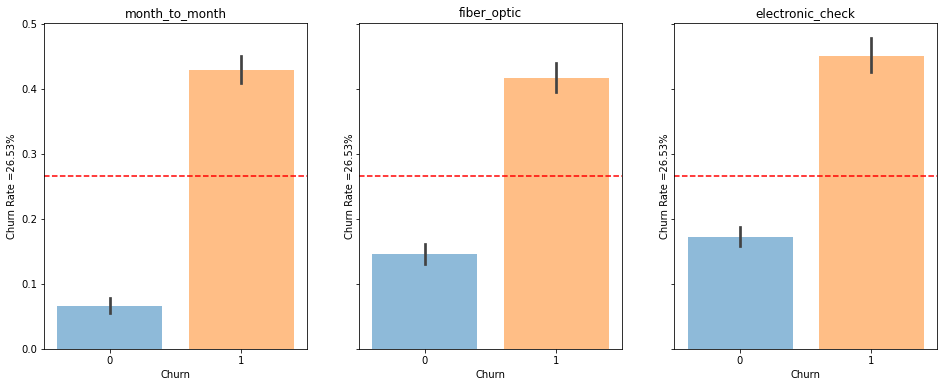

In [17]:
features = ['month_to_month', 'fiber_optic', 'electronic_check']
explore.bar_plot(features, train)

<div class="alert alert-block alert-info">
<b>Takeaways:</b>
    
- Month to month contracts have a significant higher churn rate
- Customers that have the type of internet as fiber optic have a higher churn rate. we need to check the fiber optic service to see why the customer are leaving, if it is a problem with the service ? speed? because we dont want to change our customers to dsl service.
- Customers who use electronic_check have a higher churn rate. this is not an autopay. ** we can check the relation of the customerwith month_to_month contract an electronic_check




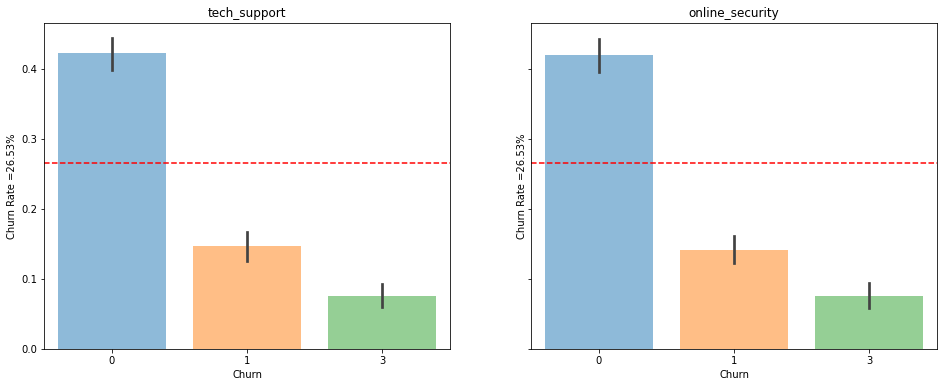

In [18]:
features = ['tech_support', 'online_security']
explore.bar_plot(features, train)

<div class="alert alert-block alert-info">
<b>Takeaways:</b>
    
- Customers who have online_security or tech_suppor have a lower churn of rate.


### Selected Driver =  tenure

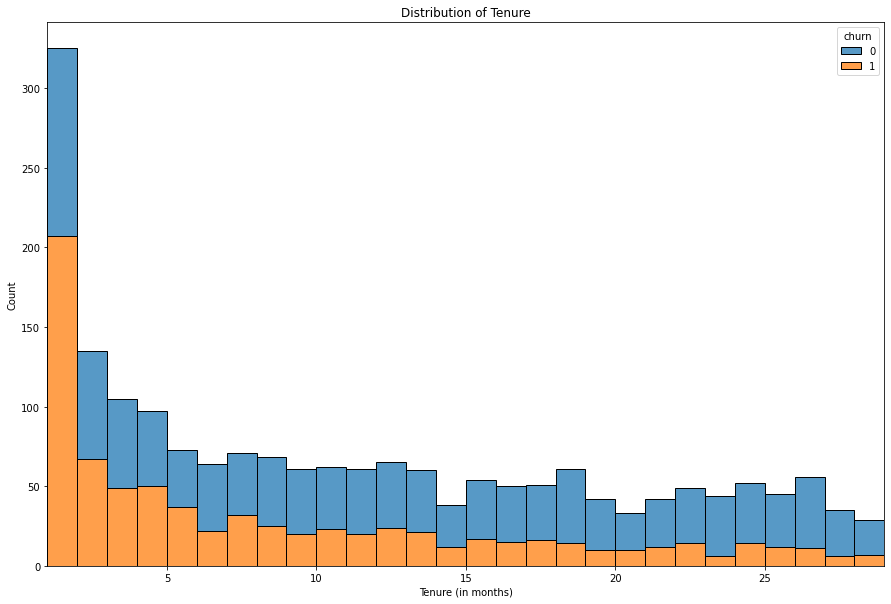

In [19]:
explore.plot_tenure(train,'tenure_months')

<div class="alert alert-block alert-info">
<b>Takeaways:</b>
    
- Churn is higher in the first month of tenure. 

## Check only the First Month of tenure

In [20]:
#using my function
explore.report_tenure (train, 1)

                      *** THE FIRST 1  MONTH(S) OF TENURE *** 

Total customers :     332 
Total cancellations : 207 
Churn rate in the first 1 month(s) of Tenure: 62.35%

****Overall churn rate: 26.53%******

________________________________________________________________________________

                    ** FIRST 1 MONTH(S) OF TENURE AND CHURN** 

Customers with phone service:         93.24% 
Customers with only internet service: 6.76% 
Monlthy charges: $ 12342.1 


Month_to_month contracts: 100.00% 
One year contract:        0.00% 
Two year contract:        0.00% 
Paperless_billing:        68.60%
Electronic_check payment type : 57.97% 


###### <div class="alert alert-block alert-info">
<b>Takeaways:</b>
    
- cancelation is   62.35 % in the first month of tenure.  (they only made one payment)
- all the cancelation in the first month are month_to_month contracts
- customers who paid with electronic checks and canceled :57.97%
- customers with  paperless_billing and canceled: 68.60%%
 

# Use function for other range of tenure

In [21]:
#using my function
explore.report_tenure (train, 6)

                      *** THE FIRST 6  MONTH(S) OF TENURE *** 

Total customers :     806 
Total cancellations : 432 
Churn rate in the first 6 month(s) of Tenure: 53.60%

****Overall churn rate: 26.53%******

________________________________________________________________________________

                    ** FIRST 6 MONTH(S) OF TENURE AND CHURN** 

Customers with phone service:         91.20% 
Customers with only internet service: 8.80% 
Monlthy charges: $ 28038.7 


Month_to_month contracts: 99.77% 
One year contract:        0.23% 
Two year contract:        0.00% 
Paperless_billing:        69.44%
Electronic_check payment type : 58.33% 


##  Statistical Tests

- tenure_months = continous 
- churn = categorical
- continous vs categorical = **t_testOne sample T-test, 2-tailed test**

In [22]:
alpha = 0.5
t, p = stats.ttest_1samp(train.tenure_months, train.churn.mean())
t,p

(83.15502839215699, 0.0)

In [23]:

if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


**Electronic Check**  

- $H_o$: Rate of churn is not dependent on using electronic check as the form of payment.
- $H_a$: Rate of churn is dependent on using electronic check as the form of payment.

Significance level  𝛼  = 0.05

- electronic_check = categorical 
- churn = categorical
- categorical vs categorical = **chi square**

In [24]:
observed2 = pd.crosstab(train.electronic_check, train.churn)
observed2

churn,0,1
electronic_check,,
0,2172,451
1,725,595


In [25]:
chi2, p, degf, expected =stats.chi2_contingency(observed2)
print('Observed\n')
print(observed2.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[2172  451]
 [ 725  595]]
---
Expected

[[1927  695]
 [ 969  350]]
---

chi^2 = 348.8043
p     = 0.0000


In [26]:
if p < alpha:
    print('We reject the null Hypothesis')
else:
    print("we fail to reject the null")

We reject the null Hypothesis


<div class="alert alert-block alert-info">
<b>Takeaways:</b>
    
- The first month of tenure the churn rate (62.35%) is really higher than overall churn rate and more than 50 % of the customers who canceled had electronic check as a payment type ad paperless billing.
 

## Plan -> Acquire -> Prepare  -> Explore <font color=green>-> Model <font color=black>-> Deliver

I am trying to predict the customers that will churn. The positive variable will be churn = 1 in my folowing models.

Possible Outcomes:

- TP: Predict churn  and it is churn
- TN: Predict  no  churn  and it is no  churn
- FP: Predict churn but it is no churn
- FN: Predict no  churn but it is  churn

In [27]:
#split my data X and y (using my function)
X_train, y_train = model_func.split_Xy(train, 'churn')
X_validate, y_validate = model_func.split_Xy(validate, 'churn')
X_test, y_test = model_func.split_Xy(test, 'churn')

**Baseline** the most frequent value of churn

In [28]:
#get the most frequen value.  0 = no churn
train.churn.value_counts().nlargest(1)

0    2897
Name: churn, dtype: int64

In [29]:
# 1. Create the object
baseline = DummyClassifier(strategy='constant', constant=0)
# 2. Fit the object
baseline.fit(X_train, y_train)
print(f'The baseline accuracy for No Churn in all cases on the telco Dataset is {baseline.score(X_train, y_train):.3%}')

The baseline accuracy for No Churn in all cases on the telco Dataset is 73.472%


In [30]:
#col_list have the list of columns with the highest correlation (I got it from exploration stage)
#here I' removing churn from this list
columns = col_listf[1:] 
columns


['month_to_month',
 'fiber_optic',
 'electronic_check',
 'has_internet',
 'monthly_charges',
 'paperless_billing',
 'total_charges',
 'streaming_tv',
 'streaming_movies',
 'device_protection',
 'online_backup',
 'two_year',
 'online_security',
 'tech_support',
 'tenure_months']

## Model 1 :  Decision Tree

In [31]:
# create the model
model_dtl= DecisionTreeClassifier(max_depth=3)
# fit the model
model_dtl.fit(X_train[columns], y_train)

# look at the model scores for training set and validate set
print(f'training score: {model_dtl.score(X_train[columns], y_train):.2%}')
print(f'validate score: {model_dtl.score(X_validate[columns], y_validate):.2%}')

training score: 79.20%
validate score: 79.36%


## Model 2 :  Random Forest

In [32]:
# create the Random Forest Model
model_rf2 = RandomForestClassifier(min_samples_leaf=4, max_depth=4, random_state=1349)
# fit the thing
model_rf2.fit(X_train[columns], y_train)
# look at the model scores for training set and validate set
print(f'training score: {model_rf2.score(X_train[columns], y_train):.2%}')
print(f'validate score: {model_rf2.score(X_validate[columns], y_validate):.2%}')

training score: 79.79%
validate score: 79.60%


## Model 3: KNN

In [33]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train[columns], y_train)
print(f'training score: {knn.score(X_train[columns], y_train):.2%}')
print(f'validate score: {knn.score(X_validate[columns], y_validate):.2%}')

training score: 79.79%
validate score: 79.07%


## Model 4 : Logistic Regression

In [34]:

model_lr1 =LogisticRegression(C=1.0 , random_state=123)
model_lr1.fit(X_train[columns], y_train)
print(f'training score: {model_lr1.score(X_train[columns], y_train):.2%}')
print(f'validate score: {model_lr1.score(X_validate[columns], y_validate):.2%}')

training score: 80.22%
validate score: 80.07%


In [35]:
#comparing my 2 best models (logistic regresion and Random forest) using my function
model_func.compare(model_lr1, model_rf2, X_validate[columns], y_validate)


    ******       Model 1  ******                                ******     Model 2  ****** 
    The accuracy for our model 1 is 80.0710%            |   The accuracy for our model 2 is 79.5979%  
                                                        |
    The True Positive Rate is 55.457%                   |   The True Positive Rate is 44.989%  
    The False Positive Rate is 11.031%                  |   The False Positive Rate is 7.890% 
    The True Negative Rate is 88.969%                   |   The True Negative Rate is 92.110% 
    The False Negative Rate is 44.543%                  |   The False Negative Rate is 55.011%

    _____________________________________________________________________________________________________________
    

    The positive is  'churn'

    Confusion Matrix
    


,pred_no_churn,pred_churn
actual_no_churn,True Negative: 1105,False positive: 137
actual_churn,False Negative: 200,True Positive: 249
,pred_no_churn,pred_churn
actual_no_churn,True Negative: 1144,False positive: 98
actual_churn,False Negative: 247,True Positive: 202




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
no_churn,0.846743,0.889694,0.867687,1242.000000
churn,0.645078,0.554566,0.596407,449.000000
accuracy,0.800710,0.800710,0.800710,0.800710
macro avg,0.745911,0.722130,0.732047,1691.000000
weighted avg,0.793196,0.800710,0.795656,1691.000000
,precision,recall,f1-score,support
no_churn,0.822430,0.921095,0.868971,1242.000000
churn,0.673333,0.449889,0.539386,449.000000
accuracy,0.795979,0.795979,0.795979,0.795979
macro avg,0.747882,0.685492,0.704178,1691.000000


In [36]:
#compare my best model (model_lr1) train and validate
model_func.compare_metrics(model_lr1,'Train',X_train[columns], y_train,'validate', X_validate[columns], y_validate)


    ******    Train       ******                              ******     validate    ****** 
       Overall Accuracy:  80.22%              |                Overall Accuracy:  80.07%  
                                                
    True Positive Rate:  54.88%               |          The True Positive Rate:  55.46%  
    False Positive Rate:  10.63%              |          The False Positive Rate:  11.03% 
    True Negative Rate:  89.37%               |          The True Negative Rate:  88.97% 
    False Negative Rate:  45.12%              |          The False Negative Rate:  44.54%
    _________________________________________________________________________________
    

    Positive =  'churn'
    Confusion Matrix
    


,pred_no_churn,pred_churn
actual_no_churn,TN : 2589,FP : 308
actual_churn,FN : 472,TP : 574
,pred_no_churn,pred_churn
actual_no_churn,TN : 1105,FP : 137
actual_churn,FN : 200,TP : 249



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
no_churn,0.845802,0.893683,0.869084,2897.000000
churn,0.650794,0.548757,0.595436,1046.000000
accuracy,0.802181,0.802181,0.802181,0.802181
macro avg,0.748298,0.721220,0.732260,3943.000000
weighted avg,0.794070,0.802181,0.796490,3943.000000
,precision,recall,f1-score,support
no_churn,0.846743,0.889694,0.867687,1242.000000
churn,0.645078,0.554566,0.596407,449.000000
accuracy,0.800710,0.800710,0.800710,0.800710
macro avg,0.745911,0.722130,0.732047,1691.000000


<div class="alert alert-block alert-info">
<b>Takeaways:</b>
    
- All my  models that I created perfomed better than my baseline (no churn). Baseline accuracy is 73.472%
- I select least dropoff in accuracy from train to validate and highest accuracy * this time (other times I need to choose the least dropoff in accuracy from train to validate rather than the highest accuracy ) 
- My best model is logistic regression.

## Test the Best Model


In [37]:
model_func.model_performs(X_test[columns], y_test, model_lr1)


    The accuracy for our model is 80.4826%

    The True Positive Rate is 59.626%,    The False Positive Rate is 11.981%,
    The True Negative Rate is 88.019%,    The False Negative Rate is 40.374%

    ________________________________________________________________________________
    

    The positive is  'Churn'

    Confusion Matrix
    


,pred_no_churn,pred_churn
actual_no_churn,True Negative: 911,False positive: 124
actual_churn,False Negative: 151,True Positive: 223




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
No Churn,0.857815,0.880193,0.868860,1035.000000
Churn,0.642651,0.596257,0.618585,374.000000
accuracy,0.804826,0.804826,0.804826,0.804826
macro avg,0.750233,0.738225,0.743723,1409.000000
weighted avg,0.800703,0.804826,0.802428,1409.000000


## Plan -> Acquire -> Prepare  -> Explore -> Model -> <font color=green>Deliver

In [38]:
### Create the Predictions CSV

In [39]:
#get probability
proba_test = model_lr1.predict_proba(X_test[columns])
#convert it into a df
prob_df = pd.DataFrame(proba_test, columns =['no_churn', 'churn_prob'])
#dropping one column
prob_df.drop(columns= 'no_churn',inplace =True)
prob_df.head()

,churn_prob
0,0.044263
1,0.429395
2,0.155935
3,0.198863
4,0.437662


In [40]:
#reset index to concat in test df (getting only the customer_id)
reset_test = test['customer_id'].reset_index()
#dropping index column
reset_test.drop(columns='index', inplace=True)
reset_test.head()

,customer_id
0,8670-ERCJH
1,0356-ERHVT
2,4786-UKSNZ
3,5945-AZYHT
4,4432-ADRLB


In [41]:
#concat the two df
test_proba_df = pd.concat([reset_test, prob_df], axis=1)

In [42]:
# calculate predictions
pred1 = model_lr1.predict(X_test[columns])
#add my prediction to the  test_proba_df
test_proba_df['predicted'] = pred1
test_proba_df.head()

,customer_id,churn_prob,predicted
0,8670-ERCJH,0.044263,0
1,0356-ERHVT,0.429395,0
2,4786-UKSNZ,0.155935,0
3,5945-AZYHT,0.198863,0
4,4432-ADRLB,0.437662,0


In [43]:
# Write DataFrame to a csv file for deliverable.

test_proba_df.to_csv('predictions.csv')

<div class="alert alert-block alert-info">
<b>Conclusion and Next Steps:</b>
    
- The customers who canceled in the first month of service also have something in common: more than 50 % used electronic checks (not autopay option) and paperless billing.  
- We can make a recommendation based on the first months of tenure, paperless billing with any auto payment option. (change electronic check to auto payment option)
- With more time:
    - I would include more features (or create an option to select some features) in my report functions, create tables so it can be easy to compare.
    - I would like to check why customers with fiber optic are canceled more than DSL 
    